<a href="https://colab.research.google.com/github/agus2207/ESCOM/blob/master/Analisis_de_imagenes/P3_AGR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1w0hKLRBfUWki17i13oJcYhpwHa2tEon1oZagn7lYdogzehai&usqp=CAU" width="100" height="100" align="left" alt="IPN"/>
<img src="https://img1.freepng.es/20180531/hyf/kisspng-escom-instituto-politcnico-nacional-escuela-supe-lemon-grass-5b0fbe5636a625.6618946915277584222239.jpg" width="100" height="100" align="right" alt="Escom"/>
<h1><center><b>Análisis de Imagenes</b></center></h1>
<h1><center><b>Practica 3: Filtrado Espacial. Los filtros paso altas</b></center></h1>

---

- **`Integrantes:`** Galindo Reyes Agustin
- **`Grupo`**: 3CV6.
- **`Materia`**: Análisis de Imágenes.
- **`Profesora`**: Maria Elena Cruz Meza.
- **`Fecha de entrega`**: 28 de Mayo del 2020.
- **`Objetivo`**: Comprender el funcionamiento y operación de las técnicas de filtros basados en su linealidad.


# **Marco Teórico**
Los filtros pasa altas tienen la funcion de detectar cambios de luminosidad en una imagen en escala de grises, existen varios tipos de filtros entre los que se encuentran: 


*   Primera derivada de Fourier (Filtros Sobel, Prewitt, Roberts)
*   Segunda derivada de Fourier (Filtros Laplacianos y Gaussianos)


Al ser filtros detectores de cambios de luminosidad,generalmente son utilizadoes para la deteccion de patrones como puden ser bordes o detalles finos de la imagen.





## **Kernels de Convolución**

### Roberts


>$Roberts_{fila} =
 \begin{pmatrix}
  0 & 0  & -1 \\
  0 & 1  & 0 \\
  0 & 0 & 0
 \end{pmatrix}$

 >$Roberts_{Columna} =
 \begin{pmatrix}
  -1 & 0  & 0 \\
  0 & 1  & 0 \\
  0 & 0 & 0
 \end{pmatrix}$

### Prewitt

>$Prewitt_{fila} = \frac{1}{3} 
 \begin{pmatrix}
  1 & 0 & -1 \\
  1 & 0 & -1 \\
  1 & 0 & -1
 \end{pmatrix}$

 >$Prewitt_{Columna} =\frac{1}{3} 
 \begin{pmatrix}
  -1 & -1 & -1 \\
  0 & 0 & 0 \\
  1 & 1 & 1
 \end{pmatrix}$

 ### Sobel

>$Sobel_{fila} = \frac{1}{4} 
 \begin{pmatrix}
  1 & 0 & -1 \\
  2 & 0 & -2 \\
  1 & 0 & -1
 \end{pmatrix}$

 >$Sobel_{Columna} =\frac{1}{4} 
 \begin{pmatrix}
  -1 & -2 & -1 \\
  0 & 0 & 0 \\
  1 & 2 & 1
 \end{pmatrix}$


# Funciones

In [114]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Image_analisis/Practica3_ME/Imagenes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Image_analisis/Practica3_ME/Imagenes


In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [116]:
def im_show(pic,ip):
    height=pic.shape[0]
    width=pic.shape[1]
    
    print(type(pic))
    channels=1
    if pic.ndim>2:
        channels=3
    #ip="nearest"
    plt.figure(figsize=(10,int(10*float(height)/float(width)) ))
    if channels==1:
        plt.imshow(pic,cmap='gray',interpolation=ip,aspect="auto")
    else:
        plt.imshow(pic,interpolation=ip,aspect="auto")

def im_load(file):
    pic=Image.open(file) #Open the image
    print("Image type:"+str(type(pic))) #Displays the type of image (JPEG, BMP, PNG, GIF, etc)
    pic_arr = np.asarray(pic) #converts the image to an Numpy Array
    print("Dimentions"+str(pic_arr.shape)) #(height,width,#of channels)
    pic_channels=1
    if pic_arr.ndim>2:
        pic_channels=3
    print("Channels:"+str(pic_channels))
    #im_show(pic_arr)
    return pic_arr

def grayscale(pic):
    height=pic.shape[0]
    width=pic.shape[1]
    
    channels=1
    if pic.ndim==3:
        channels=pic.shape[2]
    
    if channels==1:
        return pic

    factor=np.array([0.24,0.65,0.11])
    if channels==4:
        factor=np.array([0.24,0.65,0.11,1])

    pic2=np.dot(pic.astype(dtype=np.float),factor)

    return pic2.astype(dtype=np.uint8)

In [117]:
def valid_pixel(pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def kernel_espejo(kernel):
    new_kernel = np.rot90(kernel,2)
    return new_kernel

def convolusion(image, kernel, inicio_x, inicio_y):
    if(image.ndim == 3):
        image = grayscale(image)
    height = image.shape[0]
    width = image.shape[1]
    kernel = kernel_espejo(kernel)
    h_kernel = kernel.shape[0]
    w_kernel = kernel.shape[1]
    img_r = np.zeros((height, width), dtype=np.uint8)
    img_t = np.zeros((height+h_kernel-1, width+w_kernel-1), dtype=np.int16)
    img_t[inicio_x:height+inicio_x, inicio_y:width+inicio_y] = image.copy()
    for i in range(0, height):
        for j in range(0, width):
            res = 0.0
            conter_i = i
            for k_i in range(0,h_kernel):
                conter_j = j
                for k_j in range(0,w_kernel):
                    tem = float(img_t[conter_i, conter_j])*float(kernel[k_i, k_j])
                    res+=tem
                    conter_j+=1
                conter_i+=1
            img_r[i,j] = int(validar_pixel(round(res)))
    return img_r

In [118]:
def addImages(pic1,pic2):
    height = pic1.shape[0]
    width = pic1.shape[1]
    res_pic = np.ones([height, width],np.uint)
    for i in range(0,height):
        for j in range(0,width):
            res_pic[i][j]=pic1[i][j]+ pic2[i][j]
            if(res_pic[i][j]>255):
                res_pic[i][j] = 255
    return res_pic

In [119]:
def validacion(valor, t):
    if(valor >= t):
        res = 1
    elif(valor < t):
        res = 0
    return res

def gradiente(image, t):
    height = image.shape[0]
    width = image.shape[1]
    img_r = np.zeros((height, width), dtype=np.uint8)
    img_t = np.zeros((height+2, width+2), dtype=np.int16)
    img_t[1:height+1, 1:width+1] = image.copy()
    for i in range(1,height+1):
        for j in range(1,width+1):
            gx = (img_t[i+1,j]-img_t[i,j])/1
            gy = (img_t[i,j+1]-img_t[i,j])/1
            temp = abs(gx)+abs(gy)
            img_r[i-1,j-1] = validacion(temp,t)
    return img_r

In [120]:
robertf=np.array([[0,0,-1],
                  [0,1,0],
                  [0,0,0]])

robertc=np.array([[-1,0,0],
                  [0,1,0],
                  [0,0,0]])

prewittf=np.array([[1,0,-1],
                  [1,0,-1],
                  [1,0,-1]])


prewittc = np.array([[-1,-1,-1],
                     [0,0,0],
                     [1,1,1]])


sobelf=np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

sobelc=np.array([[-1,-2,-1],
                  [0,0,0],
                  [1,2,1]])

gaussian_kernel = np.array([[1/16, 2/16, 1/16],
                            [2/16, 4/16, 2/16],
                            [1/16, 2/16, 1/16]])

laplaciano = np.array([[0,1,0],
                       [1,-4,1],
                       [0,1,0]])

laplaciano2 = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])


In [121]:
ruta = "./"
nombre1 = "carta-inlgesa-10-corazones.jpg"

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(177, 220, 3)
Channels:3
Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(177, 220, 3)
Channels:3
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


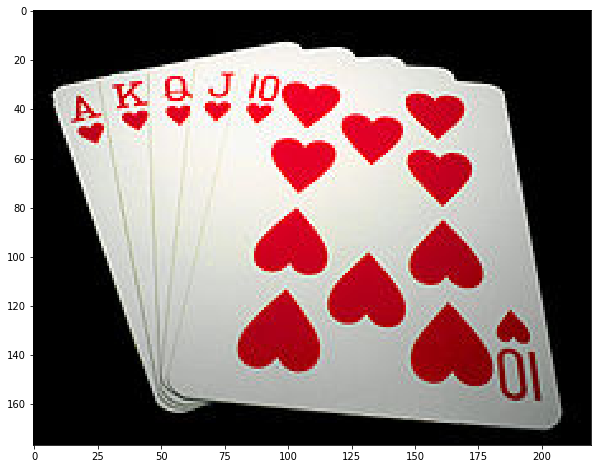

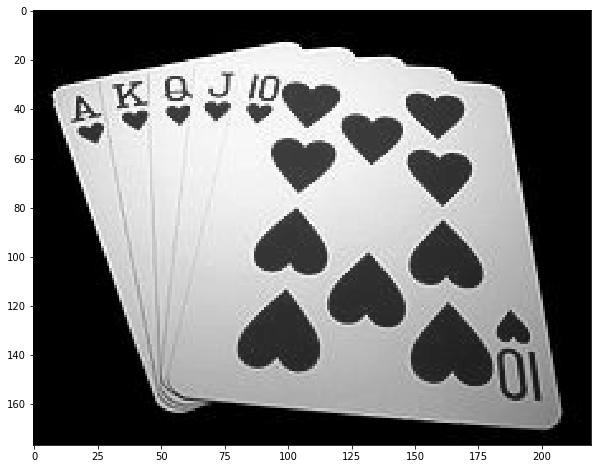

In [122]:
carta = im_load(ruta+nombre1)
cartaux = im_load(ruta+nombre1)
im_show(carta,"nearest")

carta=grayscale(carta)
im_show(carta, "nearest")

## Prewitt

Text(0.5, 0.98, 'Filas. Columnas. Suma de imágenes.')

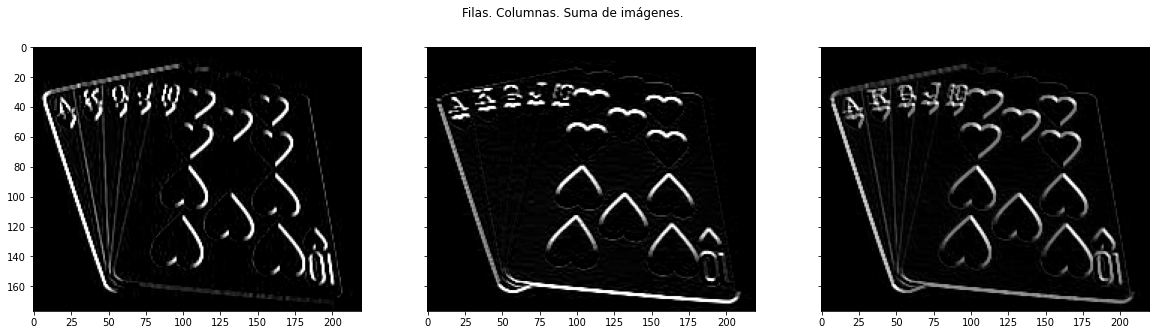

In [123]:
pruebaf = (1/3)*(convolucion(carta,prewittf,1,1))
pruebac = (1/3)*(convolucion(carta,prewittc,1,1))
prewitt = addImages(pruebaf,pruebac)

fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
axs[0].imshow(pruebaf, cmap=plt.cm.gray)
axs[1].imshow(pruebac, cmap=plt.cm.gray)
axs[2].imshow(prewitt, cmap=plt.cm.gray)
fig.suptitle('Filas. Columnas. Suma de imágenes.')

## Sobel

Text(0.5, 0.98, 'Filas. Columnas. Suma de imágenes.')

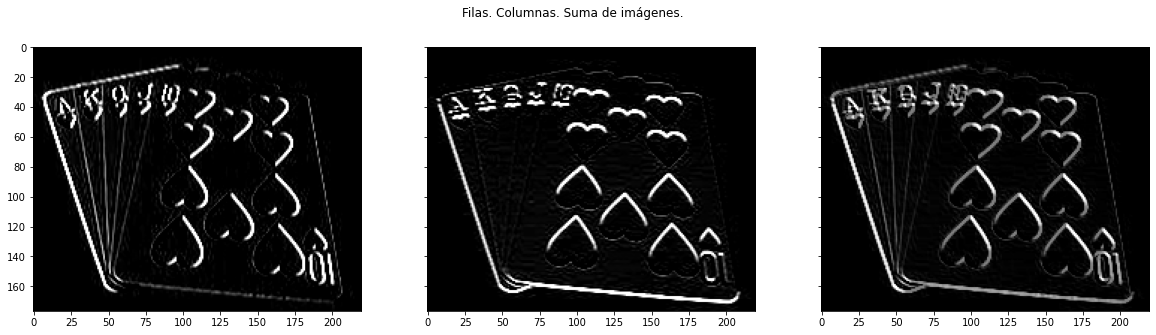

In [124]:
prueba1f = (1/4)*(convolucion(carta,sobelf,1,1))
prueba1c = (1/4)*(convolucion(carta,sobelc,1,1))
sobel = addImages(prueba1f,prueba1c)

fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
axs[0].imshow(prueba1f, cmap=plt.cm.gray)
axs[1].imshow(prueba1c, cmap=plt.cm.gray)
axs[2].imshow(sobel, cmap=plt.cm.gray)
fig.suptitle('Filas. Columnas. Suma de imágenes.')

## Roberts

Text(0.5, 0.98, 'Filas. Columnas. Suma de imágenes.')

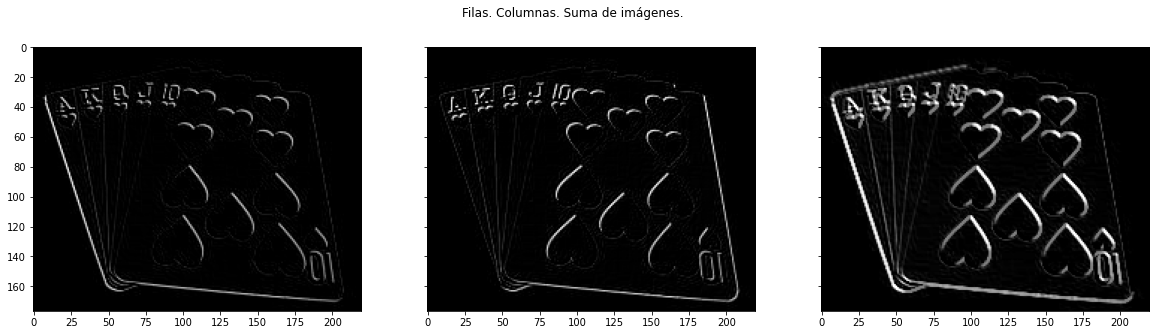

In [125]:
prueba2f = (1/4)*(convolucion(carta,robertf,1,1))
prueba2c = (1/4)*(convolucion(carta,robertc,1,1))
roberts = addImages(prueba1f,prueba1c)

fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)
axs[0].imshow(prueba2f, cmap=plt.cm.gray)
axs[1].imshow(prueba2c, cmap=plt.cm.gray)
axs[2].imshow(roberts, cmap=plt.cm.gray)
fig.suptitle('Filas. Columnas. Suma de imágenes.')

## Laplaciano

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


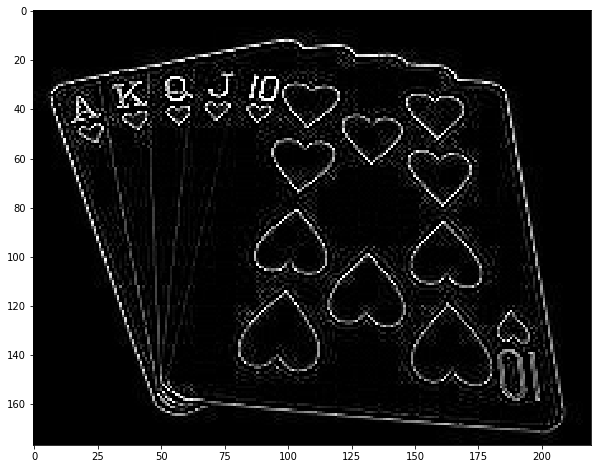

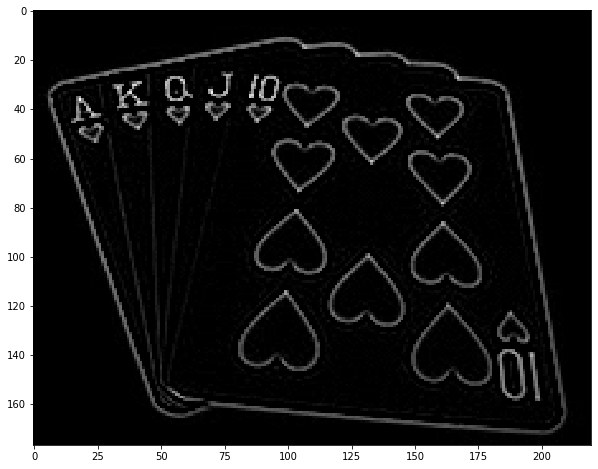

In [126]:

laplaciano1 = convolusionp(carta,laplaciano,1,1)
im_show(laplaciano1,"nearest")

carta=convolusionp(carta,gaussian_kernel,1,1)
laplaciano1 = convolusionp(carta,laplaciano,1,1)
im_show(laplaciano1,"nearest")

<class 'numpy.ndarray'>


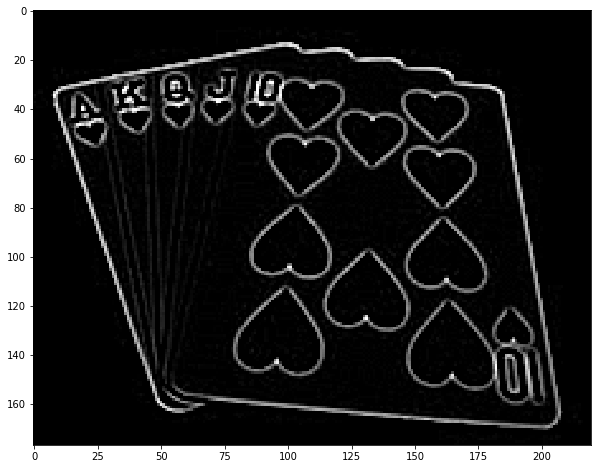

In [127]:
prueba_laplaciano = convolusionp(carta,laplaciano2,1,1)
im_show(prueba_laplaciano,"nearest")

<class 'numpy.ndarray'>


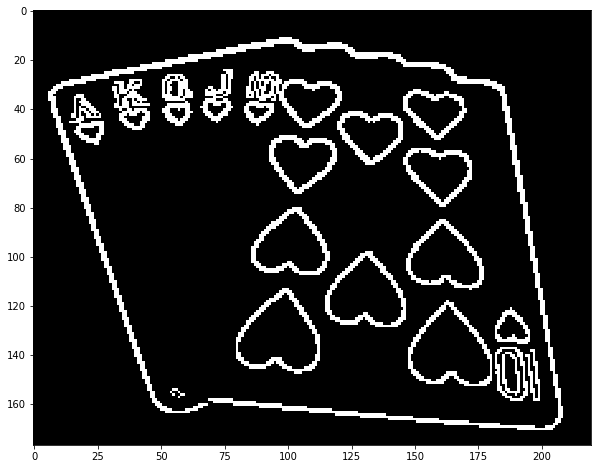

In [128]:
carta_gradiente = gradiente(carta,50)
im_show(carta_gradiente,"nearest")